## Lead Scoring Case Study

The company requires a model that will assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

### Step 1: Importing Dataset

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Lead score
leads= pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [5]:
# Let's see the head of our master dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#check for duplicates
sum(leads.duplicated(subset = 'Prospect ID')) 

0

In [9]:
#check for duplicates
sum(leads.duplicated(subset = 'Lead Number')) 

0

In [10]:
## Drop Prospect ID and Lead Number as they are not relevant features and are unique

In [11]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [12]:
#Converting 'Select' values to Null as Select indicates customer has not selected any value.

leads = leads.replace('Select', np.nan)

In [13]:
#checking null values in each rows

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
#dropping cols with more than 45% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, 1, inplace = True)

In [16]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
# Check the values in column Country
leads['Country'].value_counts(normalize=True)  

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [18]:
#This columns can be dropped as 95% of the values are India. Not a valueable feature for modelling
cols_to_drop=['Country']

In [19]:
# Check the values in column City
leads['City'].value_counts(normalize=True) 

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [20]:
#we can drop this column as well as most of it carries the value Mumbai and 39% is null
cols_to_drop.append('City')
cols_to_drop

['Country', 'City']

In [21]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

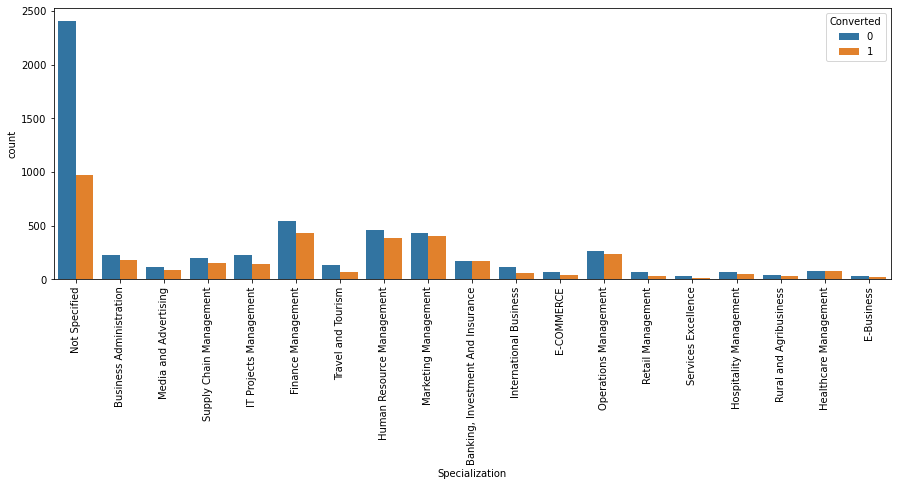

In [23]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [24]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
#Large number of leads are unemplyed and since null is a huge number, imputing Nan values with "Unknown"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unknown')

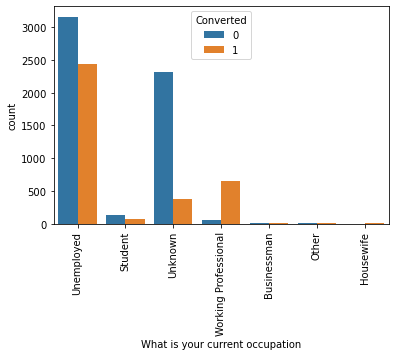

In [26]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [27]:
#checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
#This Column that is worth Dropping as it has a class imbalance problem. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'City', 'What matters most to you in choosing a course']

In [29]:
cols_to_drop

['Country', 'City', 'What matters most to you in choosing a course']

In [30]:
#checking value counts of Tag variable
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 


##### Considering the high number of nulls and Tag is representing the ongoing status with the student, it is not very useful for model

In [33]:
cols_to_drop.append('Tags')

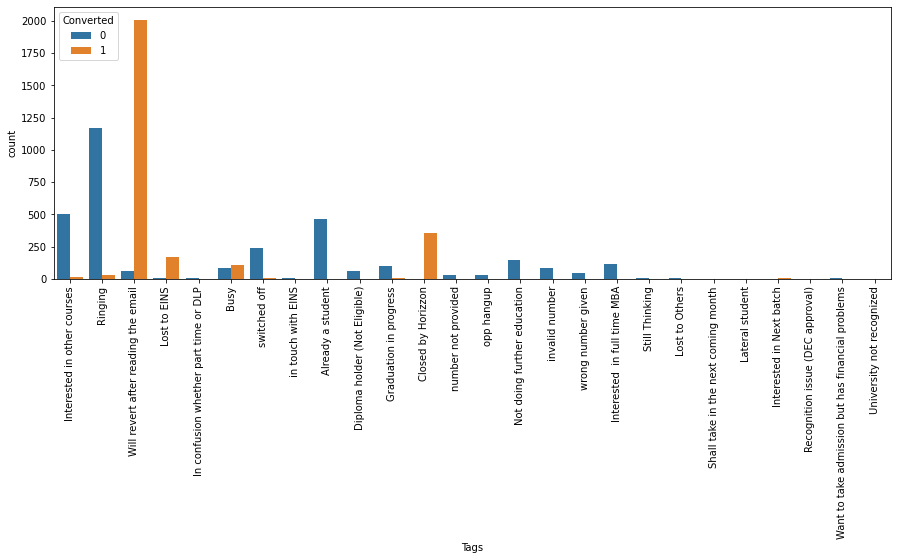

In [34]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [35]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [36]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [37]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')   

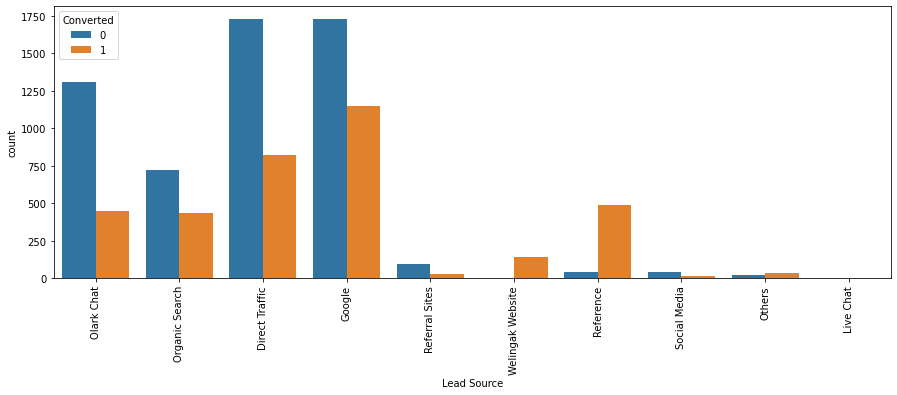

In [38]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [39]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [40]:
#replacing Nan Values and combining with low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

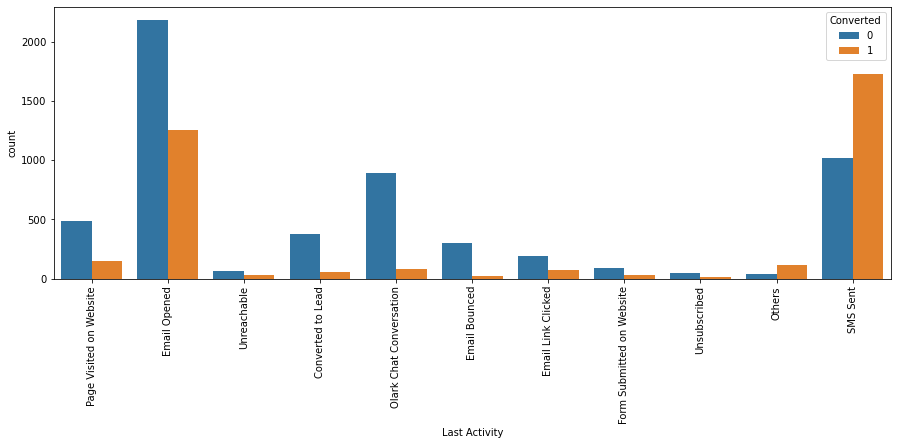

In [41]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Last Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [42]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [43]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [44]:
## Better to drop this column
cols_to_drop.append('Do Not Call')

In [45]:
#checking value counts for Do Not Call
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [46]:
# IMBALANCED VARIABLES THAT CAN BE DROPPED
leads.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [47]:
leads.Magazine.value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [48]:
## Checking the unique value distribution of categoty columns
for column in leads:
    print(leads[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
----------------------------------------------------------------------------------------
No     9238
Yes       2
Name: Do Not Call, dtype: int64
----------------------------------------------------------------------------------------
0    5679
1    3561
Name: Converted, dtype: int64
-------

In [49]:
## Add all columns wth class imbalance to be dropped
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [50]:
cols_to_drop

['Country',
 'City',
 'What matters most to you in choosing a course',
 'Tags',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [51]:
leads.drop(columns=cols_to_drop,inplace=True)

In [52]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [53]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [56]:
# Drop the rows with null total visists
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [57]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [58]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [59]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

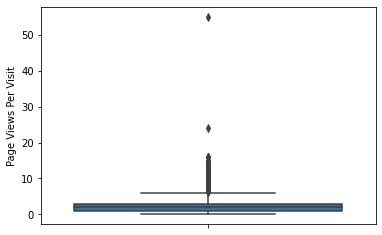

In [60]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

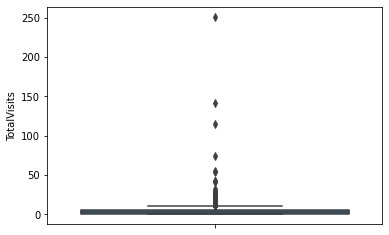

In [61]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

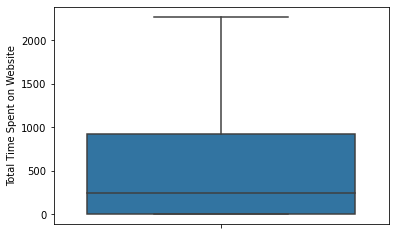

In [62]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

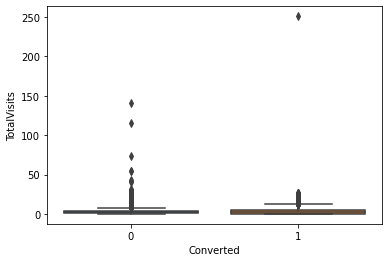

In [63]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

In [64]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [65]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   obje

### Step 3: Data Preparation

#### Converting binary variables (Yes/No) to 0/1

In [66]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads list
leads[varlist] = leads[varlist].apply(binary_map)

In [67]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0,Modified


In [68]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   int64  
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   int6

#### For categorical variables with multiple levels, create dummy features 

In [69]:
# dummy encoding for the categorical variables
dummies = pd.get_dummies(leads.select_dtypes(include=['object']), drop_first=True)

# dropping the original columns and concatinating the dummy columns
leads = leads.drop(leads.select_dtypes(include=['object']).columns, axis=1)
leads = pd.concat([leads, dummies], axis=1)

In [70]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9103 non-null   int64  
 1   Converted                                             9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   A free copy of Mastering The Interview                9103 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 8   Lead Origin_Lead Import                               9103

In [71]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [72]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

In [73]:
## This shows there is no signifcant class imbalance with Coverted variable

### Step 4: Test-Train Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [76]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,0.011952,0.570794,0.027273,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5520,0,0.027888,0.026631,0.127273,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0.019920,0.075011,0.045455,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1566,0,0.055777,0.550821,0.063636,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9170,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
### Checking the Churn Rate
convertion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
convertion

38.02043282434362

<AxesSubplot:ylabel='Converted'>

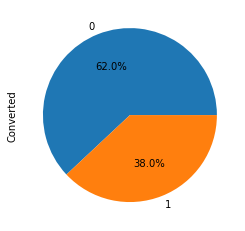

In [81]:
leads.Converted.value_counts(normalize= True).plot.pie(autopct='%1.1f%%')

### Step 6: Looking at Correlations

In [82]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

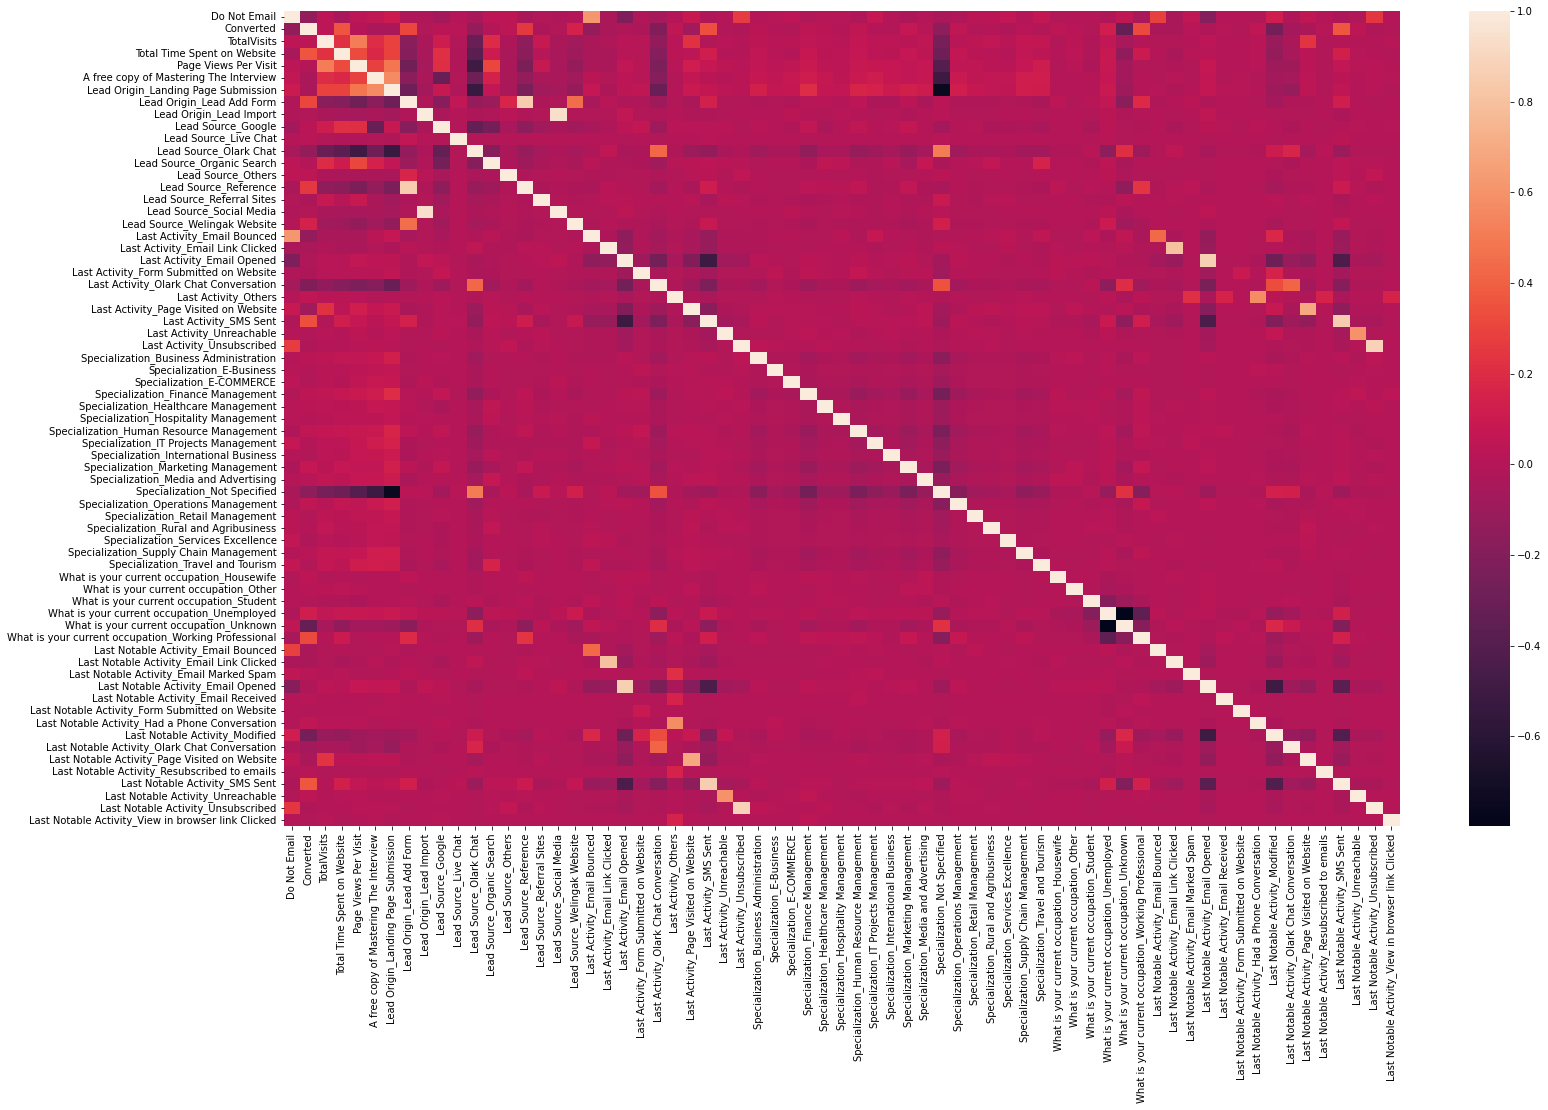

In [83]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

#### Since there are too many vaiables, it will be difficult to make the decision at this stage

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [84]:
import statsmodels.api as sm

In [85]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2498.8
Date:                Tue, 21 Mar 2023   Deviance:                       4997.7
Time:                        19:50:04   Pearson chi2:                 6.24e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4193
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   19.3454   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Do Not Email                                            -1.4186      0.218     -6.506      0.000      -1.846      -0.991
TotalVisits                                             11.3213      2.733      4.143      0.000       5.966      16.677
Total Time Spent on Website                              4.4889      0.172     26.173      0.000       4.153       4.825
Page Views Per Visit                                    -4.4463      1.406     -3.163      0.002      -7.201      -1.691
A free copy of Mastering The Interview                  -0.1073      0.110     -0.975      0.329      -0.323       0.108
Lead Origin_Landing Page Submission                     -0.7474      0.138     -5.410      0.000      -1.018      -0.477
Lead Origin_Lead Add Form                                2.9071      1.051      2.766      0.006       0.847       4.967
Lead Origin_Lead Import                                 -0.0772      1.205     -0.064      0.949      -2.439       2.285
Lead Source_Google                                       0.2449      0.117      2.102      0.036       0.017       0.473
Lead Source_Live Chat                                   20.3816   3.41e+04      0.001      1.000   -6.68e+04    6.68e+04
Lead Source_Olark Chat                                   1.2082      0.165      7.302      0.000       0.884       1.533
Lead Source_Organic Search                               0.1371      0.131      1.047      0.295      -0.119       0.394
Lead Source_Others                                       0.7386      0.742      0.996      0.319      -0.716       2.193
Lead Source_Reference                                    0.4030      1.076      0.375      0.708      -1.706       2.512
Lead Source_Referral Sites                              -0.0866      0.374     -0.232      0.817      -0.819       0.646
Lead Source_Social Media                                 0.9084      1.149      0.791      0.429      -1.343       3.160
Lead Source_Welingak Website                             2.7079      1.274      2.126      0.033       0.212       5.204
Last Activity_Email Bounced                              0.1912      0.525      0.364      0.716      -0.838       1.221
Last Activity_Email Link Clicked                         0.5680      0.436      1.303      0.193      -0.286       1.422
Last Activity_Email Opened                               1.2138      0.247      4.911      0.000       0.729       1.698
Last Activity_Form Submitted on Website                  0.3701      0.389      0.952      0.341      -0.392       1.132
Last Activity_Olark Chat Conversation                   -0

### Step 8: Feature Selection Using RFE

In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [87]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', False, 35),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Live Chat', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Others', False, 19),
 ('Lead Source_Reference', False, 20),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 44),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visite

In [89]:
# wherever RFE support is false, those variables can be dropped
col = X_train.columns[rfe.support_]

In [90]:
X_train = X_train[col]

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6372 non-null   int64  
 1   TotalVisits                                           6372 non-null   float64
 2   Total Time Spent on Website                           6372 non-null   float64
 3   Lead Origin_Landing Page Submission                   6372 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6372 non-null   uint8  
 5   Lead Source_Olark Chat                                6372 non-null   uint8  
 6   Lead Source_Welingak Website                          6372 non-null   uint8  
 7   Last Activity_Others                                  6372 non-null   uint8  
 8   Last Activity_SMS Sent                                6

#### We ave reduced the feature set to 15 most significant variables

##### Assessing the model with StatsModels

In [92]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.0
Date:                Tue, 21 Mar 2023   Deviance:                       5156.0
Time:                        19:50:14   Pearson chi2:                 6.25e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4046
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8485      0.107    -17.338      0.000      -2.058      -1.640
Do Not Email                                            -1.3763      0.171     -8.051      0.000      -1.711      -1.041
TotalVisits                                              6.8739      2.197      3.129      0.002       2.568      11.180
Total Time Spent on Website                              4.5626      0.168     27.235      0.000       4.234       4.891
Lead Origin_Landing Page Submission                     -0.2953      0.089     -3.301      0.001      -0.471      -0.120
Lead Origin_Lead Add Form                                3.6976      0.236     15.665      0.000       3.235       4.160
Lead Source_Olark Chat                                   1.0692      0.124      8.614      0.000       0.826       1.312
Lead Source_Welingak Website                             1.7570      0.752      2.335      0.020       0.282       3.232
Last Activity_Others                                     1.7556      0.449      3.914      0.000       0.876       2.635
Last Activity_SMS Sent                                   1.2986      0.076     17.079      0.000       1.150       1.448
What is your current occupation_Housewife               23.2177   1.57e+04      0.001      0.999   -3.07e+04    3.07e+04
What is your current occupation_Unknown                 -1.1821      0.088    -13.362      0.000      -1.355      -1.009
What is your current occupation_Working Professional     2.5269      0.187     13.532      0.000       2.161       2.893
Last Notable Activity_Modified                          -0.8856      0.080    -11.079      0.000      -1.042      -0.729
Last Notable Activity_Olark Chat Conversation           -1.2060      0.317     -3.806      0.000      -1.827      -0.585
Last Notable Activity_Unreachable                        1.7922      0.517      3.468      0.001       0.779       2.805
========================================================================================================================
"""

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.38
2,Total Time Spent on Website,1.93
1,TotalVisits,1.58
12,Last Notable Activity_Modified,1.54
8,Last Activity_SMS Sent,1.51
10,What is your current occupation_Unknown,1.50
4,Lead Origin_Lead Add Form,1.49
5,Lead Source_Olark Chat,1.41
6,Lead Source_Welingak Website,1.32
11,What is your current occupation_Working Profes...,1.18


In [95]:
##We can drop features that have high P-value

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [96]:
## Refit the model with the new set of features

In [97]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.0
Date:                Tue, 21 Mar 2023   Deviance:                       5170.0
Time:                        19:50:15   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8413      0.106    -17.300      0.000      -2.050      -1.633
Do Not Email                                            -1.3801      0.171     -8.079      0.000      -1.715      -1.045
TotalVisits                                              6.7471      2.190      3.081      0.002       2.454      11.040
Total Time Spent on Website                              4.5599      0.167     27.259      0.000       4.232       4.888
Lead Origin_Landing Page Submission                     -0.2882      0.089     -3.227      0.001      -0.463      -0.113
Lead Origin_Lead Add Form                                3.6984      0.236     15.684      0.000       3.236       4.161
Lead Source_Olark Chat                                   1.0655      0.124      8.593      0.000       0.822       1.308
Lead Source_Welingak Website                             1.7525      0.752      2.329      0.020       0.278       3.227
Last Activity_Others                                     1.7474      0.449      3.896      0.000       0.868       2.627
Last Activity_SMS Sent                                   1.2909      0.076     16.996      0.000       1.142       1.440
What is your current occupation_Unknown                 -1.1873      0.088    -13.432      0.000      -1.361      -1.014
What is your current occupation_Working Professional     2.5187      0.187     13.496      0.000       2.153       2.884
Last Notable Activity_Modified                          -0.8826      0.080    -11.064      0.000      -1.039      -0.726
Last Notable Activity_Olark Chat Conversation           -1.2080      0.317     -3.813      0.000      -1.829      -0.587
Last Notable Activity_Unreachable                        1.7859      0.517      3.455      0.001       0.773       2.799
========================================================================================================================
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.38
2,Total Time Spent on Website,1.93
1,TotalVisits,1.58
11,Last Notable Activity_Modified,1.54
8,Last Activity_SMS Sent,1.51
9,What is your current occupation_Unknown,1.50
4,Lead Origin_Lead Add Form,1.48
5,Lead Source_Olark Chat,1.41
6,Lead Source_Welingak Website,1.32
10,What is your current occupation_Working Profes...,1.18


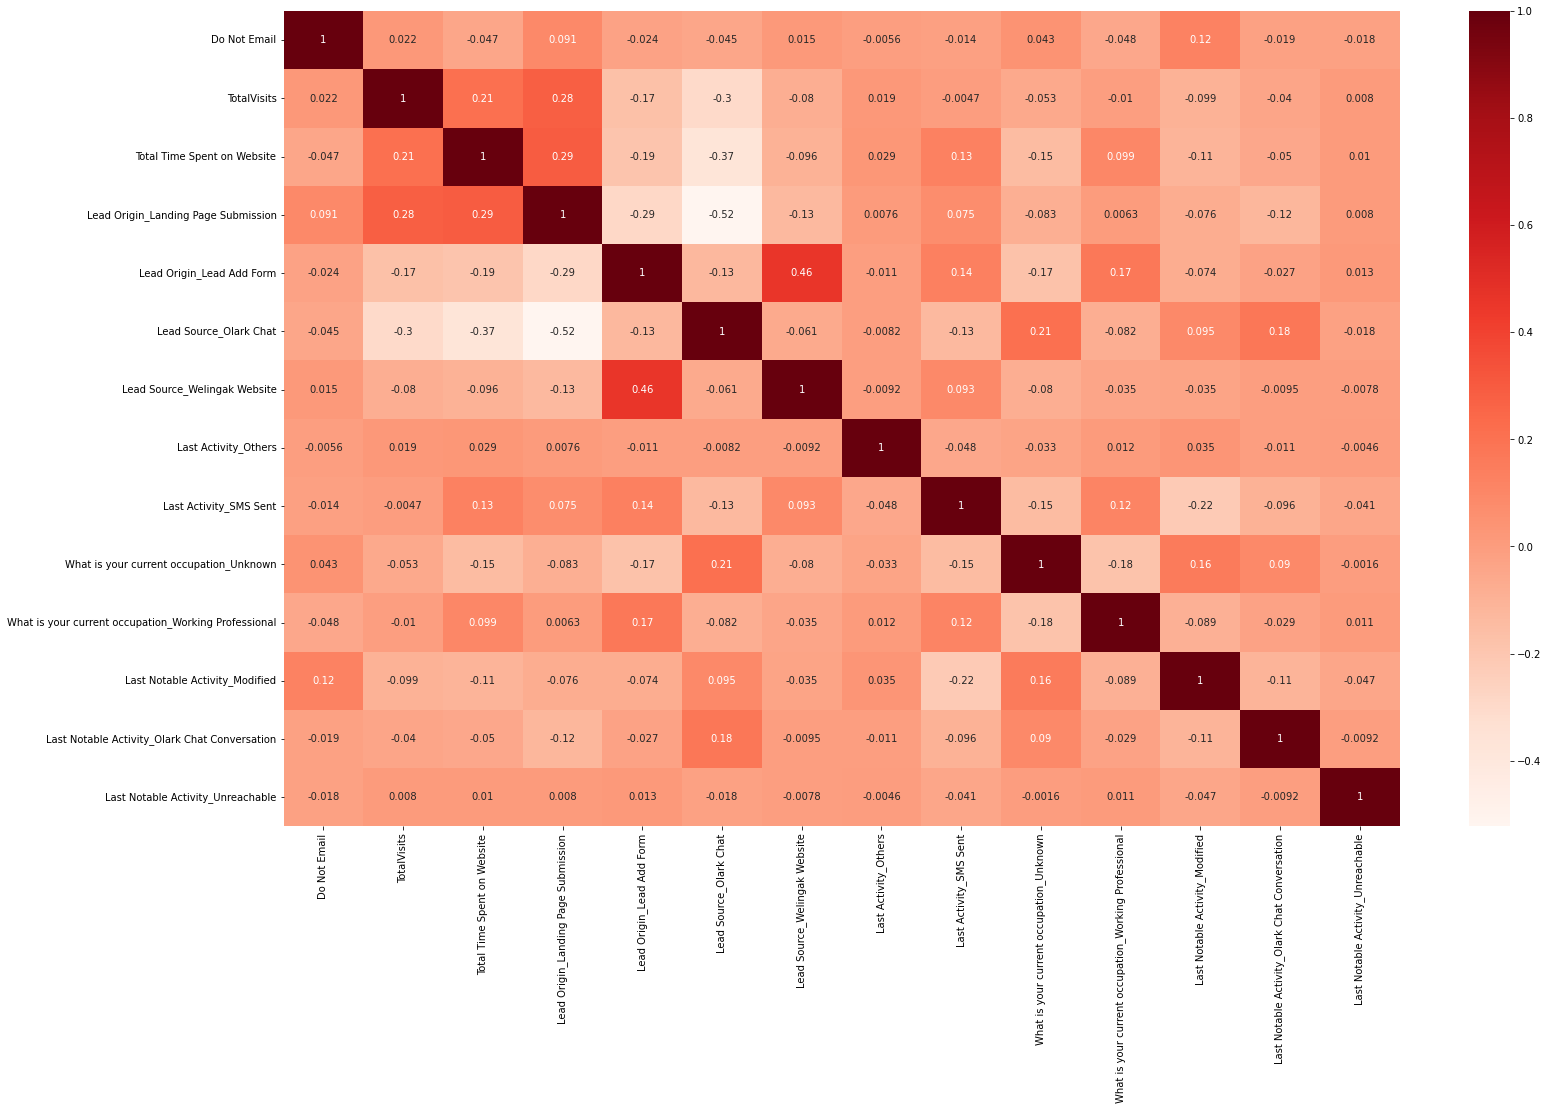

In [99]:
plt.figure(figsize = (25,15))
sns.heatmap(X_train.corr(), annot= True, cmap= "Reds")
plt.show()

In [100]:
## No strong correlation between the feature variables

### Step 8 : Model evaluation

In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.863514
5520    0.139438
1962    0.223599
1566    0.963637
9170    0.315212
5097    0.123125
8954    0.513034
309     0.188029
5519    0.337997
1050    0.532022
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.8635137 , 0.13943841, 0.22359898, 0.96363745, 0.31521162,
       0.12312541, 0.5130341 , 0.18802948, 0.33799677, 0.53202178])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.863514
1,0,0.139438
2,0,0.223599
3,1,0.963637
4,0,0.315212


##### Creating new column 'predicted' with 1 if Conv_prob > 0.5 else 0

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.863514,1
1,0,0.139438,0
2,0,0.223599,0
3,1,0.963637,1
4,0,0.315212,0


In [105]:
from sklearn import metrics

In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3516  437]
 [ 738 1681]]


In [107]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8155994978028877


##### Metrics beyond simply accuracy

In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
FN

738

In [110]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6949152542372882

In [111]:
# Let us calculate specificity
TN / float(TN+FP)

0.8894510498355679

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

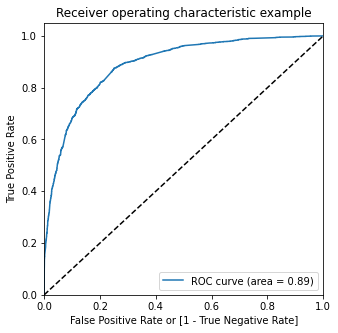

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [115]:
## Aread under the curve is 0.89 which indeicates the model is good

### Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [116]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.863514,1,1,1,1,1,1,1,1,1,1,0
1,0,0.139438,0,1,1,0,0,0,0,0,0,0,0
2,0,0.223599,0,1,1,1,0,0,0,0,0,0,0
3,1,0.963637,1,1,1,1,1,1,1,1,1,1,1
4,0,0.315212,0,1,1,1,1,0,0,0,0,0,0


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.620213  0.973129  0.404250
0.2   0.2  0.763340  0.903266  0.677713
0.3   0.3  0.797081  0.863580  0.756388
0.4   0.4  0.813402  0.773047  0.838098
0.5   0.5  0.815599  0.694915  0.889451
0.6   0.6  0.810264  0.629186  0.921073
0.7   0.7  0.786566  0.523357  0.947635
0.8   0.8  0.761142  0.423729  0.967620
0.9   0.9  0.716886  0.274907  0.987351


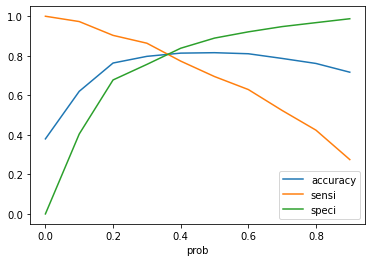

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [119]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.863514,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.139438,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.223599,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.963637,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.315212,0,1,1,1,1,0,0,0,0,0,0,0


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8110483364720653


In [121]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3268,  685],
       [ 519, 1900]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7854485324514262

In [124]:
## While accuracy remains same, sensitivity has improved with the cutoff at 0.38

#### Precision and Recall

In [125]:
#Looking at the confusion matrix again

In [126]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3268,  685],
       [ 519, 1900]], dtype=int64)

##### Precision
TP / TP + FP

In [127]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7350096711798839

##### Recall
TP / TP + FN

In [128]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7854485324514262

Using sklearn utilities for the same

In [129]:
from sklearn.metrics import precision_score, recall_score

In [130]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7350096711798839

In [131]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7854485324514262

#### Precision and recall tradeoff

In [132]:
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

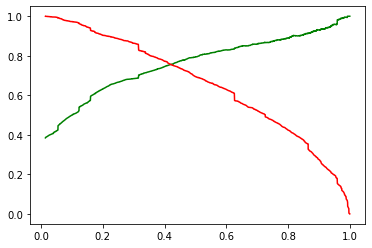

In [135]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [136]:
## Cutoff of 0.38 seems to be fine for the optimum precision-recall value

### Step 10: Making predictions on the test set

In [137]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [138]:
X_test = X_test[col]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2731 entries, 3504 to 5826
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2731 non-null   int64  
 1   TotalVisits                                           2731 non-null   float64
 2   Total Time Spent on Website                           2731 non-null   float64
 3   Lead Origin_Landing Page Submission                   2731 non-null   uint8  
 4   Lead Origin_Lead Add Form                             2731 non-null   uint8  
 5   Lead Source_Olark Chat                                2731 non-null   uint8  
 6   Lead Source_Welingak Website                          2731 non-null   uint8  
 7   Last Activity_Others                                  2731 non-null   uint8  
 8   Last Activity_SMS Sent                                2

In [139]:
X_test.drop(['What is your current occupation_Housewife'], 1, inplace = True)

In [140]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [141]:
y_test_pred = res.predict(X_test_sm)

In [142]:
y_test_pred[:10]

3504    0.233121
4050    0.958829
7201    0.326525
1196    0.237594
8219    0.191315
8747    0.123125
9048    0.311801
6524    0.068478
7693    0.133835
8187    0.958829
dtype: float64

In [143]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [144]:
# Let's see the head
y_pred_1.head()

,0
3504,0.233121
4050,0.958829
7201,0.326525
1196,0.237594
8219,0.191315


In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [146]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [147]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [148]:
y_pred_final.head()

,Converted,0
0,0,0.233121
1,1,0.958829
2,0,0.326525
3,0,0.237594
4,1,0.191315


In [149]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [150]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.233121
1,1,0.958829
2,0,0.326525
3,0,0.237594
4,1,0.191315


In [151]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [152]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.233121,0
1,1,0.958829,1
2,0,0.326525,0
3,0,0.237594,0
4,1,0.191315,0


In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8143537165873307

In [154]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1403,  286],
       [ 221,  821]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Let's see the sensitivity/Recall of our logistic regression model
TP / float(TP+FN)

0.7879078694817658

In [157]:
# Calculate Precision

TP/(TP+FP)

0.7416440831074977

#### Lead score on the test data
#### Multiply the probality by 100 to get a lead score between 1 - 100

In [158]:
y_pred_final['Lead Score'] = (y_pred_final.Conversion_Prob*100).astype(int)

In [159]:
y_pred_final.head(10)

,Converted,Conversion_Prob,final_predicted,Lead Score
0,0,0.233121,0,23
1,1,0.958829,1,95
2,0,0.326525,0,32
3,0,0.237594,0,23
4,1,0.191315,0,19
5,0,0.123125,0,12
6,1,0.311801,0,31
7,0,0.068478,0,6
8,0,0.133835,0,13
9,0,0.958829,1,95
